In [55]:
#!pip install opencv-python

  Using cached opencv_python-4.1.2.30-cp37-cp37m-win_amd64.whl (33.0 MB)


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [106]:
#C:/Users/Amruth PC/Desktop/SEM 2/AI/data/helmet_detection/training
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [107]:
##Import libraries
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [108]:
## Initialising the CNN
classifier = Sequential()

In [109]:
## Convolution(64 feature detector of dimension 3 by 3), input shape 3 layer for color image)
classifier.add(Conv2D(64,(3,3),input_shape = (64,64,3), activation = 'relu'))
## MaxPooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))


In [110]:
## Flattening
classifier.add(Flatten())

In [111]:
## Fully connected ANN, Hidden ANN and output layer
classifier.add(Dense(units = 128, activation = 'relu'))


In [112]:
#output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [113]:
## Compliling
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [114]:
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2304)             

In [115]:
## data importing and transforming and scaling
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [116]:
## Scaling test data
##no  data augmentation
test_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [117]:
## Importing training data
train_set = train_datagen.flow_from_directory('C:/Users/Amruth PC/Desktop/SEM 2/AI/data/helmet_detection/training',
                                               target_size=(64, 64),
                                               
                                               class_mode='binary')

Found 647 images belonging to 2 classes.


In [118]:
train_set.class_indices

{'with helmet': 0, 'without helmet': 1}

In [119]:
#which is cat which is dog?
label_map = (train_set.class_indices)
print(label_map)

{'with helmet': 0, 'without helmet': 1}


In [120]:
from PIL import Image
## Importng test data
test_set = test_datagen.flow_from_directory('C:/Users/Amruth PC/Desktop/SEM 2/AI/data/helmet_detection/testing',
                                            target_size=(64, 64),
                                            
                                            class_mode='binary')

Found 208 images belonging to 2 classes.


In [121]:
test_set

In [ ]:
## fitting model to images
classifier.fit_generator(
        train_set,
        epochs=100,
        validation_data=test_set
        )

Epoch 1/100
21/21 [==============================] - 3s 130ms/step - loss: 0.0094 - accuracy: 0.9969 - val_loss: 0.0180 - val_accuracy: 0.9808
Epoch 2/100
21/21 [==============================] - 3s 151ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0246 - val_accuracy: 0.9712
Epoch 3/100
21/21 [==============================] - 3s 152ms/step - loss: 0.0250 - accuracy: 0.9954 - val_loss: 0.0120 - val_accuracy: 0.9712
Epoch 4/100
21/21 [==============================] - 3s 132ms/step - loss: 0.0069 - accuracy: 0.9985 - val_loss: 0.0648 - val_accuracy: 0.9952
Epoch 5/100
21/21 [==============================] - 3s 132ms/step - loss: 0.0049 - accuracy: 0.9985 - val_loss: 7.3106e-04 - val_accuracy: 0.9567
Epoch 6/100
21/21 [==============================] - 3s 160ms/step - loss: 0.0071 - accuracy: 0.9985 - val_loss: 0.0094 - val_accuracy: 0.9808
Epoch 7/100
21/21 [==============================] - 4s 167ms/step - loss: 0.0246 - accuracy: 0.9876 - val_loss: 0.0685 - val_accuracy: 0.

C:\Users\Amruth PC\Anaconda3\envs\tensorflow_env\lib\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 9 could not be retrieved. It could be because a worker has died.
  UserWarning)


In [124]:
classifier.evaluate(test_set)

7/7 [==============================] - 0s 52ms/step


[0.02534724585711956, 0.9807692170143127]

In [126]:
images = []
names=[]
pred=[]
folder_path='C:/Users/Amruth PC/Desktop/SEM 2/AI/data/helmet_detection/single_prediction'
for img in os.listdir(folder_path):
    names.append(img)
    img = os.path.join(folder_path, img)
    img = image.load_img(img, target_size=(64, 64))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images.append(img)

# stack up images list to pass for prediction
images = np.vstack(images)
classes = classifier.predict_classes(images, batch_size=10)
print(classes)
for i in classes:
    if(i==1):
        pred.append('With Out Helmet')
    else:
        pred.append('With Helmet')
data=pd.DataFrame(pred)
data.columns=['Pred']
data['Img']=names
print(data)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
               Pred        Img
0       With Helmet    wh1.jpg
1       With Helmet    wh2.jpg
2       With Helmet    wh3.jpg
3       With Helmet    wh4.jpg
4       With Helmet    wh5.jpg
5       With Helmet    wh7.jpg
6       With Helmet   woh1.jpg
7   With Out Helmet  woh10.jpg
8       With Helmet  woh11.jpg
9       With Helmet  woh12.jpg
10  With Out Helmet   woh2.jpg
11      With Helmet   woh3.jpg
12      With Helmet   woh4.jpg
13      With Helmet   woh5.jpg
14      With Helmet   woh6.jpg
15      With Helmet   woh7.jpg
16      With Helmet   woh8.jpg
17      With Helmet   woh9.jpg


In [51]:
## prediction of single new data
import numpy as np
from keras.preprocessing import image
test_image= image.load_img('C:/Users/Amruth PC/Desktop/SEM 2/AI/data/helmet_detection/single_prediction/abc.jpg'
                           ,target_size =(128,128))


Found 0 images belonging to 0 classes.


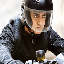

In [43]:
test_image

In [44]:
## Convert image to array
test_image = image.img_to_array(test_image)

In [45]:
## For single prediction change the dimension . 

test_image=test_image.reshape(1,128,128,3)

In [46]:
result = classifier.predict(test_image)

In [47]:
result

array([[0.]], dtype=float32)

In [48]:
## Class label of dog and cat

if result == 1:
    prediction = 'With Out Helmet'
else:
    prediction = 'With Helmet'
    

In [49]:
prediction

'With Helmet'